In [1]:
import os
sep_local = os.path.sep
sep_local

In [2]:
import sys
sys.path.append('..'+sep_local+'..')

In [3]:
#done in case of linux
#os.chdir("/home/azeghost/git/Generative_Models")
#os.chdir('..'+sep_local+'..')

'2.0.0'

In [4]:
import tensorflow as tf
tf.__version__

In [5]:
dataset_name = 'mnist'
import tensorflow_datasets as tfds

info = tfds.builder(dataset_name).info

print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [6]:
intermediate_dim = 20
inputs_shape=(28, 28, 1) # image shape
batch_size = 100
latent_dim = 50

In [7]:
TRAIN_BUF = 600
TEST_BUF = 100


In [8]:
import tensorflow_datasets as tfds
# Construct a tf.data.Dataset
train_ds = tfds.load(name=dataset_name, split=tfds.Split.TRAIN).shuffle(TRAIN_BUF).batch(batch_size)
try:
    test_ds = tfds.load(name=dataset_name, split=tfds.Split.TEST).shuffle(TEST_BUF).batch(batch_size)
except:
    test_ds = tfds.load(name=dataset_name, split=tfds.Split.TRAIN).shuffle(TEST_BUF).batch(batch_size)


In [9]:
_instance_scale=1.0
for data in train_ds:
    _instance_scale = float(data['image'][0].numpy().max())
    break

In [10]:
_instance_scale

254.0

In [11]:
enc_lays1 = [
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    # No activation
    tf.keras.layers.Dense(latent_dim)
]

enc_lays2 = [
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    # No activation
    tf.keras.layers.Dense(latent_dim)
]

dec_lays = [
    tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
    tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
    tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=(2, 2), padding="SAME", activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=(2, 2), padding="SAME", activation='relu'),
    
    # No activation
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=(1, 1), padding="SAME")
]

In [ ]:
#from utils.data_and_files.file_utils import make_random_string
#from time import gmtime, strftime

#model_name = 'AE_' + make_random_string(5) + strftime("%a_%d_%b_%Y_%H_%M", gmtime())
#print(model_name)

In [13]:
model_name = dataset_name+'Dense_VAE'

In [14]:
import os
#recoding_dir='..'+sep_local+'..'+sep_local+'..'+sep_local+'recording'+sep_local + model_name
os.getcwd()
recoding_dir=os.getcwd()+ sep_local  +'recording'+sep_local + model_name

In [15]:
from os.path import abspath
absolute = abspath(recoding_dir)
print("Recording_dir",absolute)
print("Current working dir",os.getcwd())

In [16]:
from training.traditional.autoencoders.VAE import VAE

In [17]:
variables_params = \
[
    {
        'name': 'encoder_mean', 
        'inputs_shape':inputs_shape,
        'outputs_shape':latent_dim,
        'layers': enc_lays1
    },

    {
    'name': 'encoder_logvar', 
    'inputs_shape':inputs_shape,
    'outputs_shape':latent_dim,
    'layers': enc_lays2
    }
    ,
    
        {
        'name': 'generative', 
        'inputs_shape':latent_dim,
        'outputs_shape':inputs_shape,
        'layers':dec_lays
    }
]

'..\\recoding\\mnistVAE\\mnistVAE'

In [18]:
from utils.data_and_files.file_utils import create_if_not_exist
_restore = os.path.join(recoding_dir, 'var_save_dir')
create_if_not_exist(_restore)
absolute = abspath(_restore)
print("Restore_dir",absolute)

Using TensorFlow backend.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [19]:
ae = VAE( 
    name=model_name,
    inputs_shape=inputs_shape,
    outputs_shape=inputs_shape,
    latent_dim=latent_dim,
    batch_size=batch_size,
    variables_params=variables_params, 
    filepath=None #to restore trained model, set filepath=_restore
    )

In [20]:
ae.compile(metrics=None)

In [21]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)
from training.callbacks.progress_bar import NotebookPrograssBar
from training.callbacks.sample_generation import SampleGeneration
from training.callbacks.save_model import ModelSaver

'..\\recoding\\mnistVAE\\var_save_dir'

In [22]:
progbar = NotebookPrograssBar(leave_outer=False)

Model: "encoder_mean"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 28, 28, 20)        40        
_________________________________________________________________
dense_3 (Dense)              (None, 28, 28, 20)        420       
_________________________________________________________________
dense_4 (Dense)              (None, 28, 28, 20)        420       
_________________________________________________________________
flatten_1 (Flatten)          (None, 15680)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                784050    
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dropout (Dropout)            (None, 50)               

  WARNING  | None


Model: "encoder_logvar"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 28, 28, 20)        40        
_________________________________________________________________
dense_6 (Dense)              (None, 28, 28, 20)        420       
_________________________________________________________________
dense_7 (Dense)              (None, 28, 28, 20)        420       
_________________________________________________________________
flatten_2 (Flatten)          (None, 15680)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                784050    
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)             

  WARNING  | None


Model: "generative"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_9 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_10 (Dense)             (None, 40)                1640      
_________________________________________________________________
flatten_3 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 784)               32144     
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0

  WARNING  | None


In [23]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    min_delta=1e-12, 
    patience=5, 
    verbose=1, 
    restore_best_weights=True
)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



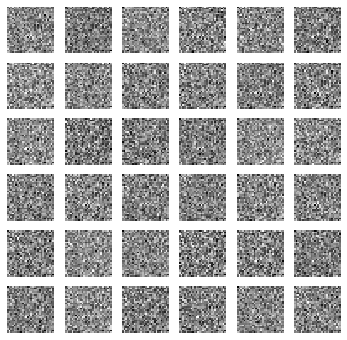

  ERROR    | No former training found ... 
Epochs Progress:   0%|                                                                          | 0/10 [00:00<?, ?it/s]

  INFO     | Training ... 
Epochs Progress, Training Iterations 41:   0%|                                                  | 0/10 [00:28<?, ?it/s]

SystemError: <built-in function TFE_Py_TapeGradient> returned a result with an error set

In [24]:
ms = ModelSaver(filepath=_restore,save_freq=5)

In [ ]:
csv_dir = os.path.join(recoding_dir, 'csv_dir')
create_if_not_exist(csv_dir)
csv_dir = os.path.join(csv_dir, model_name+'.csv')
csv_log = tf.keras.callbacks.CSVLogger(csv_dir, append=True)
absolute = abspath(csv_dir)
print("Csv_dir",absolute)

In [ ]:
image_gen_dir = os.path.join(recoding_dir, 'image_gen_dir')
create_if_not_exist(image_gen_dir)
absolute = abspath(image_gen_dir)
print("Image_gen_dir",absolute)

In [ ]:
sg = SampleGeneration(latent_shape=6, filepath=image_gen_dir, gen_freq=5, save_img=True, gray_plot=True)

In [ ]:
ae.fit(
    x=train_ds,
    steps_per_epoch=50,
    epochs=100, 
    verbose=0,
    callbacks=[progbar, es, ms, csv_log, sg],
    workers=-1,
    use_multiprocessing=True
)

In [ ]:
# probably won't work since the structure of model changed thus no exposed encode decode func available
for batch in train_ds:
    image = batch['image'].numpy()[0]
    break

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(image.reshape(28,28))

In [ ]:
reconst = ae.decode(ae.encode(image))

In [ ]:
type(reconst)

In [ ]:
isinstance(reconst, tf.Tensor)

In [ ]:
plt.imshow(reconst.numpy().reshape(28,28))

In [ ]:
ae.fit(
    x=train_ds,
    steps_per_epoch=50,
    epochs=100, 
    verbose=0,
    callbacks=[progbar, es, ms, csv_log, sg],
    workers=-1,
    use_multiprocessing=True
)

In [ ]:
# probably won't work since the structure of model changed thus no exposed encode decode func available
for batch in train_ds:
    image = batch['image'].numpy()[0]
    break

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(image.reshape(28,28))

In [ ]:
reconst = ae.decode(ae.encode(image))

In [ ]:
type(reconst)

In [ ]:
isinstance(reconst, tf.Tensor)

In [ ]:
plt.imshow(reconst.numpy().reshape(28,28))